# Import libraries and read data

In [1]:
import pandas as pd
import numpy as np

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go
from plotly.graph_objects import Bar

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import squarify

sns.set()

/home/resaln/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
# global data
confirmed_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_global_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# U.S. data
confirmed_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
deaths_us_path = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

In [3]:
# global data
confirmed_global_df = pd.read_csv(confirmed_global_path)
deaths_global_df = pd.read_csv(deaths_global_path)
recovered_global_df = pd.read_csv(recovered_global_path)

# U.S data
confirmed_us_df = pd.read_csv(confirmed_us_path)
deaths_us_df = pd.read_csv(deaths_us_path)

# Helper functions

In [4]:
def save_fig_as_div(fig_obj, file_name):
    with open(f'assets/{file_name}', 'w') as fig_file:
        fig_div_string = plotly.offline.plot(figure_or_data=fig_obj, output_type='div',
                                             include_plotlyjs='cdn')
        fig_file.write(fig_div_string)

In [5]:
def get_n_color_palette(palette_name, n_colors, as_hex=False):
    palette = sns.color_palette(palette=palette_name, n_colors=n_colors)
    if as_hex:
        palette = palette.as_hex()
    palette.reverse()
    return palette

# Get to know the data:

## Globally confirmed cases:

In [6]:
confirmed_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70


In [7]:
confirmed_global_df.shape

(266, 130)

## Globally deaths:

In [8]:
deaths_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4


In [9]:
deaths_global_df.shape

(266, 130)

## Globally recovered cases:

In [10]:
recovered_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18


In [11]:
recovered_global_df.shape

(253, 130)

## U.S. confirmed cases:

In [12]:
confirmed_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,154,154,154,154,165,165,165,166,166,167
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,21,21,21,21,22,22,22,22,22,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,69,69,69


In [13]:
confirmed_us_df.shape

(3261, 137)

## U.S. deaths:

In [14]:
deaths_us_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,123,124,124,125,126,126,127,127,129,129
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [15]:
deaths_us_df.shape

(3261, 138)

## Summary:

The three datasets share the same structure, and have the same fields, one for **confirmed** cases, one for **deaths** cases, and one for **recovered** cases.
Fields descriptioin
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the *cumulative* number of cases up until this date.

It can be seen that the `U.S.` dataset differs from the `global` one, as it has these additional columns: UID, iso2, iso3, code3, FIPS (we'll get to them later)

# Data Preprocessing:

In [16]:
# global data
print(f'Globally confirmed cases: {confirmed_global_df.shape}')
print(f'Globally deaths: {deaths_global_df.shape}')
print(f'Globally recovered cases: {recovered_global_df.shape}')

# U.S. data
print(f'U.S. Confirmed cases: {confirmed_us_df.shape}')
print(f'U.S. deaths: {deaths_us_df.shape}')

Globally confirmed cases: (266, 130)
Globally deaths: (266, 130)
Globally recovered cases: (253, 130)
U.S. Confirmed cases: (3261, 137)
U.S. deaths: (3261, 138)


although the three datasets have the same structure, they are inconsistent, the number of **recovered** cases is different, so I think we should drop it.

## 1 - Drop irrelevant columns:
`Lat` and `Long` columns specify the coordinates of the case, we won't be needing this inofrmation right now.

In [17]:
def drop_irrelevant_columns(df, irrelevant_columns):
    new_df = df.drop(columns=irrelevant_columns)
    return new_df

In [18]:
irrelevant_columns = ['Lat', 'Long']

In [19]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, irrelevant_columns)
deaths_global_df = drop_irrelevant_columns(deaths_global_df, irrelevant_columns)
recovered_global_df = drop_irrelevant_columns(recovered_global_df, irrelevant_columns)

In [20]:
confirmed_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,NaN,Albania,0,0,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,NaN,Angola,0,0,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70


In [21]:
deaths_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220
1,NaN,Albania,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4


In [22]:
recovered_global_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128
1,NaN,Albania,0,0,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18


Also, drop columns `UID`, `iso2`, `iso3`, `code3`, `FIPS`, `Admin2`, `Combined_Key` from the `U.S.` data:

In [23]:
irrelevant_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key']

In [24]:
confirmed_us_df = drop_irrelevant_columns(confirmed_us_df, irrelevant_columns)
deaths_us_df = drop_irrelevant_columns(deaths_us_df, irrelevant_columns)

In [25]:
confirmed_us_df.head()

,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,American Samoa,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,0,0,0,0,0,0,0,0,...,154,154,154,154,165,165,165,166,166,167
2,Northern Mariana Islands,US,0,0,0,0,0,0,0,0,...,21,21,21,21,22,22,22,22,22,22
3,Puerto Rico,US,0,0,0,0,0,0,0,0,...,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324
4,Virgin Islands,US,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


In [26]:
deaths_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,123,124,124,125,126,126,127,127,129,129
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


only deaths data has the column `Population`, but it should the same for the confirmed data also.

In [27]:
confirmed_us_df.insert(2, 'Population', deaths_us_df['Population'])

In [28]:
confirmed_us_df.head()

,Province_State,Country_Region,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,154,154,154,154,165,165,165,166,166,167
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,21,21,21,21,22,22,22,22,22,22
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


## 2 - Normalize columns' names:
throughout this notebook, we will be quering columns `Province/State`, `Country/Region` a lot! so it would be better to rename them so some thing like `State` and `Country` respectively.

In [29]:
def rename_columns(df, columns_mapping):
    new_df = df.rename(columns=columns_mapping)
    return new_df

In [30]:
columns_mapping = {
    'Province/State': 'State',
    'Province_State': 'State',
    'Country/Region': 'Country',
    'Country_Region': 'Country'
}

In [31]:
# global data
confirmed_global_df = rename_columns(confirmed_global_df, columns_mapping)
deaths_global_df = rename_columns(deaths_global_df, columns_mapping)
recovered_global_df = rename_columns(recovered_global_df, columns_mapping)

# U.S. data
confirmed_us_df = rename_columns(confirmed_us_df, columns_mapping)
deaths_us_df = rename_columns(deaths_us_df, columns_mapping)

### Global data:

In [32]:
confirmed_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,NaN,Albania,0,0,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,NaN,Angola,0,0,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70


In [33]:
deaths_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220
1,NaN,Albania,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4


In [34]:
recovered_global_df.head()

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128
1,NaN,Albania,0,0,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18


### U.S. data:

In [35]:
confirmed_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,154,154,154,154,165,165,165,166,166,167
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,21,21,21,21,22,22,22,22,22,22
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,2646,2710,2805,2866,2913,3030,3100,3189,3260,3324
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


In [36]:
deaths_us_df.head()

,State,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,American Samoa,US,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,US,164229,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,US,55144,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,US,2933408,0,0,0,0,0,0,0,...,123,124,124,125,126,126,127,127,129,129
4,Virgin Islands,US,107268,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


## 3 - Drop `State` column from the global data:
most records of the global data doesn't have `State` value, so it's better to drop it.

In [37]:
confirmed_global_df = drop_irrelevant_columns(confirmed_global_df, 'State')
deaths_global_df = drop_irrelevant_columns(deaths_global_df, 'State')
recovered_global_df = drop_irrelevant_columns(recovered_global_df, 'State')

In [38]:
confirmed_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,Albania,0,0,0,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,Algeria,0,0,0,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,Andorra,0,0,0,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,Angola,0,0,0,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70


In [39]:
deaths_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220
1,Albania,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617
3,Andorra,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,Angola,0,0,0,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4


In [40]:
recovered_global_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128
1,Albania,0,0,0,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803
2,Algeria,0,0,0,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918
3,Andorra,0,0,0,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676
4,Angola,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18


## 4 - Aggregate data:
aggregate the number of confirmed cases, number of deaths, and number of reovered cases at each day for each country.

aggregate global data:

In [41]:
def apply_aggregation(df, by_column):
    aggregate_df = df.groupby(by=by_column)\
                        .sum()\
                        .reset_index()
    return aggregate_df

In [42]:
by_column = 'Country'

In [43]:
# global
confirmed_global_agg_df = apply_aggregation(confirmed_global_df, by_column)
deaths_global_agg_df = apply_aggregation(deaths_global_df, by_column)
recovered_global_agg_df = apply_aggregation(recovered_global_df, by_column)

In [44]:
confirmed_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,Albania,0,0,0,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,Algeria,0,0,0,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,Andorra,0,0,0,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,Angola,0,0,0,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70


In [45]:
deaths_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,169,173,178,187,193,205,216,218,219,220
1,Albania,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,32,32,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,548,555,561,568,575,582,592,600,609,617
3,Andorra,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,Angola,0,0,0,0,0,0,0,0,0,...,2,3,3,3,3,3,4,4,4,4


In [46]:
recovered_global_agg_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,778,801,850,930,938,996,1040,1075,1097,1128
1,Albania,0,0,0,0,0,0,0,0,0,...,715,727,742,758,771,777,783,789,795,803
2,Algeria,0,0,0,0,0,0,0,0,0,...,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918
3,Andorra,0,0,0,0,0,0,0,0,0,...,617,624,628,639,639,652,653,653,663,676
4,Angola,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,18,18,18,18


aggregate U.S. data:

In [47]:
by_columns = ['Country', 'State']

In [48]:
confirmed_us_agg_df = apply_aggregation(confirmed_us_df, by_columns)
deaths_us_agg_df = apply_aggregation(deaths_us_df, by_columns)

In [49]:
confirmed_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,11771,12086,12376,13052,13288,13670,14117,14478,14986,15650
1,US,Alaska,1220488,0,0,0,0,0,0,0,...,388,388,400,401,401,403,407,407,408,410
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,1,1,1,...,13945,14208,14576,14906,15348,15624,16053,16377,16575,16864
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,4759,4813,4923,5003,5458,5612,5775,5922,6029,6180


In [50]:
deaths_us_agg_df.head()

,Country,State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,US,Alabama,4903185,0,0,0,0,0,0,0,...,488,489,504,522,529,541,549,551,566,580
1,US,Alaska,731545,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
2,US,American Samoa,55641,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,7278717,0,0,0,0,0,0,0,...,680,687,705,747,764,775,801,801,807,810
4,US,Arkansas,3017804,0,0,0,0,0,0,0,...,98,100,102,107,110,113,115,116,117,119


## 5 - create `Population` dataframe for the `U.S.` data:

Later, we will convert the data to time series structure, and the value of `Population` shouldn't be in a time series data, as it doesn't change over time, it's rather a characteristic of the state.

In [51]:
us_population_df = confirmed_us_agg_df[['Country', 'State', 'Population']]

In [52]:
confirmed_us_agg_df = drop_irrelevant_columns(confirmed_us_agg_df, ['Population'])
deaths_us_agg_df = drop_irrelevant_columns(deaths_us_agg_df, ['Population'])

In [53]:
confirmed_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,11771,12086,12376,13052,13288,13670,14117,14478,14986,15650
1,US,Alaska,0,0,0,0,0,0,0,0,...,388,388,400,401,401,403,407,407,408,410
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,1,1,1,1,...,13945,14208,14576,14906,15348,15624,16053,16377,16575,16864
4,US,Arkansas,0,0,0,0,0,0,0,0,...,4759,4813,4923,5003,5458,5612,5775,5922,6029,6180


In [54]:
deaths_us_agg_df.head()

,Country,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,US,Alabama,0,0,0,0,0,0,0,0,...,488,489,504,522,529,541,549,551,566,580
1,US,Alaska,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
2,US,American Samoa,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Arizona,0,0,0,0,0,0,0,0,...,680,687,705,747,764,775,801,801,807,810
4,US,Arkansas,0,0,0,0,0,0,0,0,...,98,100,102,107,110,113,115,116,117,119


## 5 - Restructe the Data:
convert the data into an easier structure, add column `date`, and change the columns to rows (for easier manipulation)

In [55]:
date_columns = confirmed_global_agg_df.filter(regex='\d{1,2}/\d{1,2}/\d{1,4}').columns.values

In [56]:
def construct_date_df(df, date_column_name, copy_columns, value_column_name):
    
    data = {}
    
    data['date'] = date_column_name
    
    for column in copy_columns:
        data[column] = df[column]
    
    data[value_column_name] = df[date_column_name]
    
    date_df = pd.DataFrame(data=data)
    
    return date_df

In [57]:
# global data
confirmed_global_date_frames = [construct_date_df(confirmed_global_agg_df, date_column, ['Country'], 'confirmed') for date_column in date_columns]
deaths_global_date_frames = [construct_date_df(deaths_global_agg_df, date_column, ['Country'], 'deaths') for date_column in date_columns]
recovered_global_date_frames = [construct_date_df(recovered_global_agg_df, date_column, ['Country'], 'recovered') for date_column in date_columns]

# U.S. data
confirmed_us_date_frames = [construct_date_df(confirmed_us_agg_df, date_column, ['Country', 'State'], 'confirmed') for date_column in date_columns]
deaths_us_date_frames = [construct_date_df(deaths_us_agg_df, date_column, ['Country', 'State'], 'deaths') for date_column in date_columns]

In [58]:
# global data
confirmed_global_time_series = pd.concat(confirmed_global_date_frames)
deaths_global_time_series = pd.concat(deaths_global_date_frames)
recovered_global_time_series = pd.concat(recovered_global_date_frames)

# U.S. data
confirmed_us_time_series = pd.concat(confirmed_us_date_frames)
deaths_us_time_series = pd.concat(deaths_us_date_frames)

## 6 - Convert `date` column:

In [79]:
def convert_col_to_datetime(df, col_name):
    
    df[col_name] = pd.to_datetime(df[col_name], utc=False)
    
    df[col_name]dt.strftime("%Y-%m-%d")
    
    df.sort_values(by='date', inplace=True)
    return df

In [80]:
# global data
confirmed_global_time_series = convert_col_to_datetime(confirmed_global_time_series, 'date')
deaths_global_time_series = convert_col_to_datetime(deaths_global_time_series, 'date')
recovered_global_time_series = convert_col_to_datetime(recovered_global_time_series, 'date')

# U.S. data
confirmed_us_time_series = convert_col_to_datetime(confirmed_us_time_series, 'date')
deaths_us_time_series = convert_col_to_datetime(deaths_us_time_series, 'date')

In [81]:
confirmed_global_time_series.head()

,date,Country,confirmed
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0


In [82]:
deaths_global_time_series.head()

,date,Country,deaths
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0


In [83]:
recovered_global_time_series.head()

,date,Country,recovered
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0


In [84]:
confirmed_us_time_series.head()

,date,Country,State,confirmed
0,2020-01-22,US,Alabama,0
31,2020-01-22,US,Nebraska,0
32,2020-01-22,US,Nevada,0
33,2020-01-22,US,New Hampshire,0
34,2020-01-22,US,New Jersey,0


In [85]:
deaths_us_time_series.head()

,date,Country,State,deaths
0,2020-01-22,US,Alabama,0
31,2020-01-22,US,Nebraska,0
32,2020-01-22,US,Nevada,0
33,2020-01-22,US,New Hampshire,0
34,2020-01-22,US,New Jersey,0


in the rest of the notebook, we will focus on the following five dataframes:
- `confirmed_global_time_series`: time series of the global confirmed cases.
- `deaths_global_time_series`: time series of the global deaths.
- `recovered_global_time_series`: time series of the global recovered cases.
- `confirmed_us_time_series`: time series of U.S. confirmed cases.
- `deaths_us_time_series`: time series of U.S. deaths.

A *time series* data shows the change in a *statiscal variable* according to *time*.


Each row in the previous time series is a tuple of date, country, and measure, the measure represents the cumulative sum in the country, up until the date.

## 7 - Focus on *Outbreaks*:
We will focus in this notebook only on countries with high **death tolls**, countires that are nearly affected by the pandemic will be discarded.

In [86]:
most_n_countries = 15

In [87]:
last_day = deaths_global_time_series['date'].values[-1]

In [88]:
most_affected_countries = deaths_global_time_series[deaths_global_time_series['date'] == last_day]\
                                                    .sort_values(by='deaths', ascending=False)\
                                                    [:most_n_countries]

In [89]:
most_affected_countries

,date,Country,deaths
174,2020-05-26,US,98913
178,2020-05-26,United Kingdom,37130
85,2020-05-26,Italy,32955
62,2020-05-26,France,28533
158,2020-05-26,Spain,27117
23,2020-05-26,Brazil,24512
16,2020-05-26,Belgium,9334
66,2020-05-26,Germany,8372
113,2020-05-26,Mexico,8134
81,2020-05-26,Iran,7508


In [90]:
most_affected_countries_names = most_affected_countries['Country'].values

Create time series for most affected countries:

In [91]:
most_deaths_time_series = deaths_global_time_series[deaths_global_time_series['Country']\
                                                    .isin(most_affected_countries_names)]

In [92]:
most_deaths_time_series.head()

,date,Country,deaths
122,2020-01-22,Netherlands,0
113,2020-01-22,Mexico,0
173,2020-01-22,Turkey,0
174,2020-01-22,US,0
178,2020-01-22,United Kingdom,0


In [93]:
most_confirmed_time_series = confirmed_global_time_series[confirmed_global_time_series['Country']\
                                                          .isin(most_affected_countries_names)]

In [94]:
most_confirmed_time_series.head()

,date,Country,confirmed
122,2020-01-22,Netherlands,0
113,2020-01-22,Mexico,0
173,2020-01-22,Turkey,0
174,2020-01-22,US,1
178,2020-01-22,United Kingdom,0


In [95]:
most_recovered_time_series = recovered_global_time_series[recovered_global_time_series['Country']\
                                                          .isin(most_affected_countries_names)]

In [96]:
most_recovered_time_series.head()

,date,Country,recovered
122,2020-01-22,Netherlands,0
113,2020-01-22,Mexico,0
173,2020-01-22,Turkey,0
174,2020-01-22,US,0
178,2020-01-22,United Kingdom,0


# Data Visualization:

## First infection date

In [ ]:
most_confirmed_time_series['date'] = pd.to_datetime(most_confirmed_time_series['date'], utc=False)

In [ ]:
most_confirmed_time_series.sort_values(by='date', inplace=True)

In [ ]:
most_confirmed_time_series.head()

In [ ]:
first_infection_date_df = most_confirmed_time_series[most_confirmed_time_series['confirmed'] > 0]\
                                                    .groupby('Country')\
                                                    .first()\
                                                    .reset_index()\
                                                    .sort_values(by='date')

In [ ]:
first_infection_date_df

In [ ]:
first_infection_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()

In [ ]:
html_string = first_infection_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()\
                        .render()

In [ ]:
with open('assets/first_infection_date_table.html', 'w') as html_file:
    html_file.write(html_string)

## First death date

In [ ]:
most_deaths_time_series['date'] = pd.to_datetime(most_deaths_time_series['date'], utc=False)

In [ ]:
most_deaths_time_series.sort_values(by='date', inplace=True)

In [ ]:
most_deaths_time_series.head()

In [ ]:
first_death_date_df = most_deaths_time_series[most_deaths_time_series['deaths'] > 0]\
                                                .groupby(by='Country')\
                                                .first()\
                                                .reset_index()\
                                                .sort_values(by='date')

In [ ]:
first_death_date_df

In [ ]:
first_death_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()

In [ ]:
html_string = first_death_date_df.style.set_properties(**{'background-color': 'white',
                           'color': 'black',
                           'border-color': 'white',
                           'border-width': '350px'})\
                        .format({'date': "{:%Y-%m-%d}"})\
                        .hide_index()\
                        .render()

In [ ]:
with open('assets/first_death_date_table.html', 'w') as html_file:
    html_file.write(html_string)

## Line Chart:

### Deaths trajectory

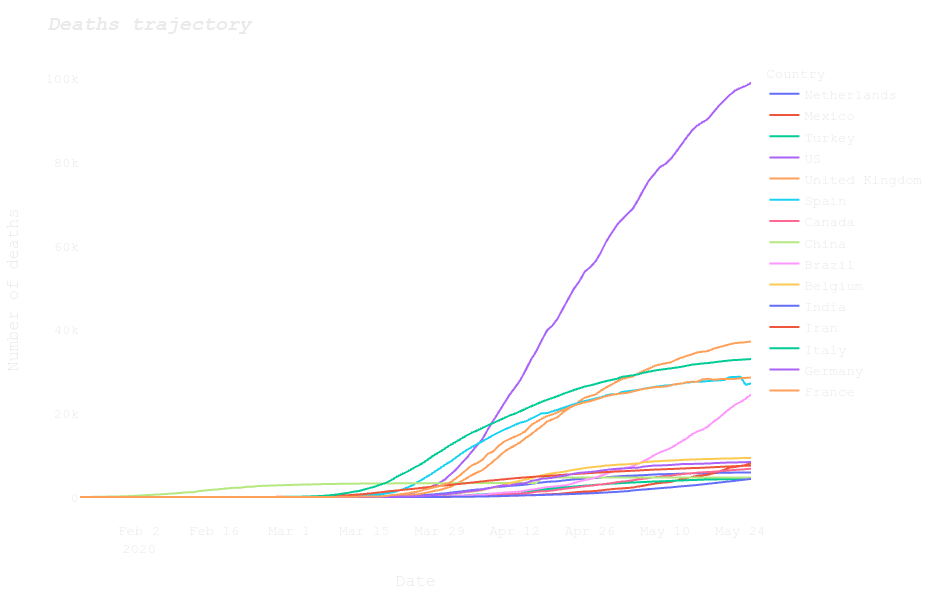

In [100]:
fig = px.line(data_frame=most_deaths_time_series, x='date', y='deaths', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Deaths trajectory</b></i>',
                  xaxis_title="Date", yaxis_title="Number of deaths",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [101]:
save_fig_as_div(fig_obj=fig, file_name="deaths_trajectory_line_chart.html")

### Infections trajectory

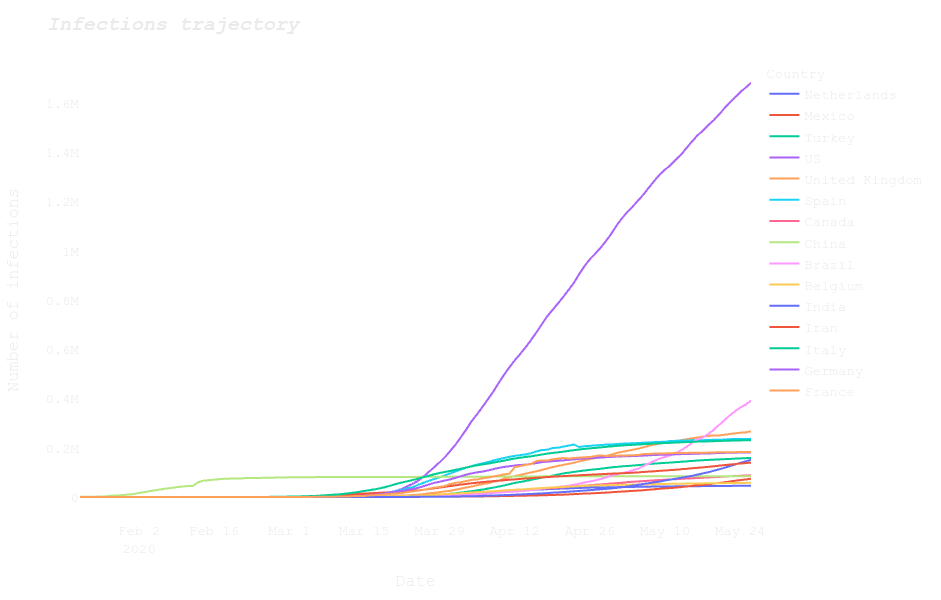

In [103]:
fig = px.line(data_frame=most_confirmed_time_series, x='date', y='confirmed', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Infections trajectory</b></i>',
                  xaxis_title="Date", yaxis_title="Number of infections",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [104]:
save_fig_as_div(fig_obj=fig, file_name="infections_trajectory_line_chart.html")

### Recovery trajectory:

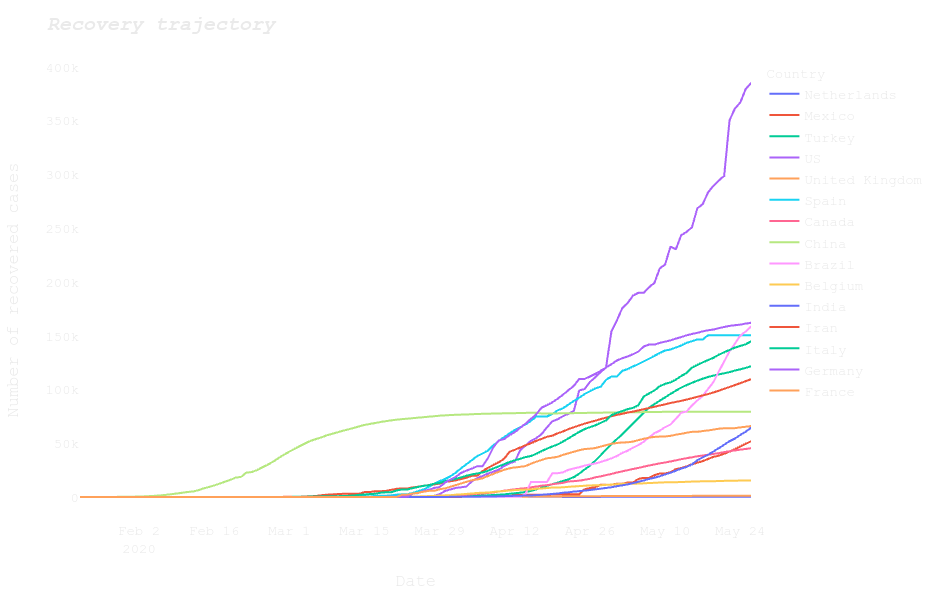

In [106]:
fig = px.line(data_frame=most_recovered_time_series, x='date', y='recovered', color='Country',
              line_group='Country')

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Recovery trajectory</b></i>',
                  xaxis_title="Date", yaxis_title="Number of recovered cases",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [107]:
save_fig_as_div(fig_obj=fig, file_name="recovery_trajectory_line_chart.html")

## Choropleth Map:

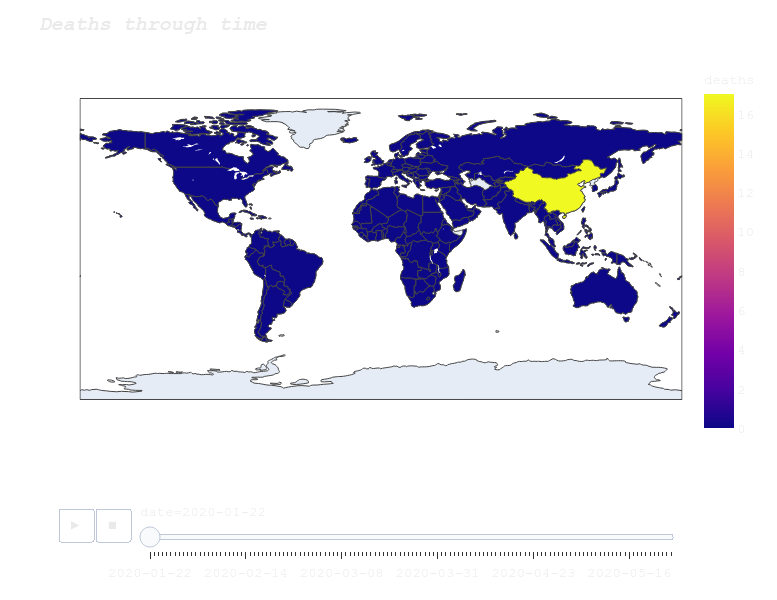

In [124]:
fig = px.choropleth(data_frame=deaths_global_time_series, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths',
                    animation_frame=deaths_global_time_series.date,
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(autosize=False,
                  width=1000, height=600,
                  title_text='<i><b>Deaths through time</b></i>',
                  xaxis_title="Measures", yaxis_title="Class",
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor= 'rgba(0, 0, 0, 0)',
                  font={
                      'family': "Courier New, monospace",
                      'size': 14,
                      'color': "#eaeaea"
                  }
                 )

fig.show()

In [122]:
deaths_global_time_series.date = deaths_global_time_series.date.dt.strftime("%Y-%m-%d")

In [123]:
deaths_global_time_series

,date,Country,deaths
0,2020-01-22,Afghanistan,0
120,2020-01-22,Namibia,0
121,2020-01-22,Nepal,0
122,2020-01-22,Netherlands,0
123,2020-01-22,New Zealand,0
...,...,...,...
64,2020-05-26,Gambia,1
65,2020-05-26,Georgia,12
66,2020-05-26,Germany,8372
57,2020-05-26,Estonia,65


In [112]:
px.choropleth?

Signature:
px.choropleth(
    data_frame=None,
    lat=None,
    lon=None,
    locations=None,
    locationmode=None,
    geojson=None,
    featureidkey=None,
    color=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders={},
    labels={},
    color_discrete_sequence=None,
    color_discrete_map={},
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    projection=None,
    scope=None,
    center=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a choropleth map, each row of `data_frame` is represented by a
    colored region mark on a map.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
    This argument needs to be passed for column names (and not keyword
    names) to be used. Array-like and dict are tranformed internally to a
    pandas DataFrame. Optional: if missing, a DataFrame gets co

## U.S. Choropleth:

In [ ]:
fig = px.choropleth(data_frame=dea, locations='Country',
                    locationmode='country names', color='deaths',
                    hover_name='deaths', animation_frame='date',
                    color_continuous_scale=px.colors.sequential.Plasma)

In [ ]:
# lookup_df = pd.read_csv('COVID-19/csse_covid_19_data/us_states_abbrevations.csv')

In [ ]:
# lookup_df.head()

In [ ]:
# confirmed_us_time_series.head()

In [ ]:
# temp_df = confirmed_us_time_series.merge(lookup_df[['State', 'Code']],
#                                 left_on='State',
#                                 right_on='State',
#                                 how='inner')

In [ ]:
# temp_df.head()

In [ ]:
# fig = px.choropleth(data_frame=temp_df,
#                     locations='Code',
#                     locationmode="USA-states",
#                     color='confirmed',
#                     animation_frame='date',
#                     scope="usa")
# fig.show()

## Stacked Area chart

In [ ]:
countries_daily_deaths.head()

In [ ]:
fig = px.area(data_frame=countries_daily_deaths, x='date', y='daily_deaths', color='Country')
fig.show()

## Histogram

In [ ]:
import plotly.figure_factory as ff

In [ ]:
help(ff.create_distplot)

In [ ]:
china_daily_deaths = countries_daily_deaths[countries_daily_deaths['Country'] == 'China']['daily_deaths'].values

In [ ]:
china_daily_deaths

In [ ]:
ff.create_distplot(hist_data)

In [ ]:
my_list = [countries_daily_deaths[countries_daily_deaths['Country'] == country_name]['daily_deaths'] for country_name in most_affected_countries_names]

In [ ]:
len(my_list)

In [ ]:
china_daily_deaths

In [ ]:
italy_daily_deaths = countries_daily_deaths[countries_daily_deaths['Country'] == 'Italy']['daily_deaths'].values

In [ ]:
italy_daily_deaths

In [ ]:
ff.create_distplot(hist_data=[china_daily_deaths, italy_daily_deaths], group_labels=['China', 'Italy'], bin_size=.2)

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", histnorm='probability density')
fig.show()

In [ ]:
px.histogram(data_frame=countries_daily_deaths, x='date', y='daily_deaths', color='Country', histnorm='probability density')

In [ ]:
def get_daily_deaths(deaths_columns):
    number_of_days = len(deaths_columns)
    daily_deaths = deaths_columns[0]
    diff = np.absolute(deaths_columns[1:number_of_days] - deaths_columns[0:number_of_days - 1])
    daily_deaths = np.append(daily_deaths, diff)
    return daily_deaths

In [ ]:
def get_daily_deaths_df(df, country_name):
    new_df = df[df['Country'] == country_name]
    new_df['date'] = pd.to_datetime(new_df['date'], utc=False)
    new_df.sort_values(by='date', inplace=True)
    country_daily_deaths = get_daily_deaths(new_df['deaths'].values)
    new_df['daily_deaths'] = country_daily_deaths
    return new_df

In [ ]:
most_affected_countries_names

In [ ]:
countries_daily_deaths = pd.concat([get_daily_deaths_df(most_deaths_time_series, country_name) for country_name in most_affected_countries_names])

In [ ]:
countries_daily_deaths.sort_values(by='date', inplace=True)

In [ ]:
countries_daily_deaths.head()

In [ ]:
fig = px.line(data_frame=countries_daily_deaths, x='date', y='daily_deaths', color='Country',
              line_group='Country', title='Daily Deaths', height=600)
fig.show()

In [ ]:
bar_chart_data = [go.Bar(name=country_name,
        x=countries_daily_deaths[countries_daily_deaths['Country'] == country_name]['date'],
        y=countries_daily_deaths[countries_daily_deaths['Country'] == country_name]['daily_deaths'])
 for country_name in most_affected_countries_names]

In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=5, cols=2)

In [ ]:
fig.add_trace(bar_chart_data[0], row=1, col=1)
fig.add_trace(bar_chart_data[1], row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="Stacked Subplots")
fig.show()

In [ ]:
px.bar(data_frame=countries_daily_deaths[countries_daily_deaths['Country'] == 'China'],
      x = 'date', y='daily_deaths', title='China daily deaths')